<a href="https://colab.research.google.com/github/lucasarneiro5/AI-Machine-Learning/blob/master/Q_Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Regressão Linear

Uma analise de regressão estuda a relação existente entre uma variável dependente e uma ou mais variáveis independentes. Essa relação é representada por um modelo matemático. Quando temos apenas uma variável independente estabelecendo uma relação linear com a variável dependente, esse modelo é chamado regressão linear simples. Quando há várias variáveis independentes, temos um modelo de regressão linear múltipla.
 

Se você já vendeu qualquer coisa, sabe que é difícil definir um bom preço de venda. Muitas vezes colocamos o preço barato demais (e vendemos na hora) e algumas vezes colocamos o preço tão alto que não aparece nenhum interessado sequer. Se formos falar de imóveis, aí temos vários fatores complicadores.

<p align="center">
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-02.49.34-1.png" width="50%"></p>

Na figura acima, temos o *scatter plot* entre área do imóvel e preço de venda do mesmo para a cidade de Ames, localizada no estado americano de Iowa. Vamos supor que você tenha uma casa com uma área de 1339 $m^2$ e queira colocá-la a venda. Qual seria o preço que você colocaria nela?

Uma vez que temos dados de milhares de outras casas e parece esses dados têm uma relação linear, por que não tentar traçar uma reta para inferir o preço da nossa própria casa?

<p align="center">
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-02.52.24-1.png" width="50%"></p>

Uma reta por ser representada por uma equação do tipo $\hat{y} = \theta_0 + \theta_1 x_1$, onde $\hat{y}$ é o valor que estamos querendo prever.

Para saber o "quão boa" uma reta é, ou seja, se ela é ideal para representar os nosso pontos, podemos calcuar o erro quadrático médio (*Mean Squared Error* - MSE) para todos os pontos.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Basicamente, essa equação calcula a distância de cada ponto até a reta. Quanto menor for esse valor, melhor é a nossa solução. O algoritmo do `scikit-learn` efetua todos os cálculos para minimizar esse valor ao máximo para nós. Quando ele encontra esse valor *ótimo*, armazena os valores dos coeficientes e do intercepto como atributo da variável.

<p align="center">
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/1_fX95txC9xSwSPeP6ch2nmg.gif" width="30%"></p>

## Regressão Linear Simples

Para demonstrar como implementar uma Regressão Linear Simples, nós iremos usar o *dataset* [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) juntamente com a biblioteca `scikit-learn`.


O [*dataset* original](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) que eu estou usando neste *notebook* contém 79 variáveis relativas à imóveis de Ames, uma cidade localizada no estado americano de Iowa, e está disponível para download no Kaggle. No entanto, para facilitar o entendimento dos conceitos básicos, preparei uma versão simplificada desse *dataset*, onde há apenas uma variável. O arquivo `csv` está disponível [neste link](http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0).

Vou começar importando o arquivo para um *DataFrame* e fazendo uma análise bem rápida deste. Lembre-se, o foco deste módulo não é fazer uma análise exploratória extensiva, mas sim focar na etapa de implementação de modelos de *Machine Learning*.


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")

# ver as primeiras entradas
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


O *dataset* importado contém a variável `GrLivArea` contendo o tamanho do imóvel ($m^2$) e a variável alvo `SalePrice` com o preço de venda do mesmo. Vou plotar um gráfico de dispersão para termos ideia de como os pontos estão relacionados.


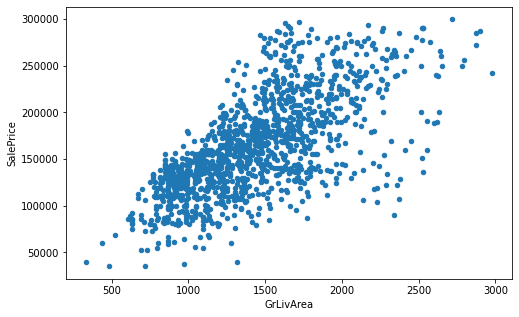

In [2]:
# plotar gráfico de dispersãp.
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

### Regressão Linear Simples com o `scikit-learn`

Uma vez que você tenha feito toda uma análise exploratória, definido variáveis e preparado os dados adequadamente, chegou o momento de construir a Regressão Linear Simples.

Em competições do Kaggle, normalmente são fornecidos dados de treino e teste. Já no mundo real, você deve dividir o seu conjunto entre *train* e *test* de maneira que eles sejam mutuamente exclusivos.

Essa etapa é de extrema importância, pois vai tornar o modelo mais genérico e com melhor precisão em relação aos dados novos que venham a ser entrada do mesmo. Neste *dataset*, eu vou separar 20% dos dados para o teste no final.



In [3]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Eu vou separar a variável dependente (`SalePrice`) da nossa *feature*, e usar a função `train_test_split` para fazer a divisão entre dados de treino e teste.

In [4]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df['GrLivArea']
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

ValueError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do `sklearn.pipeline` do pacote. Ela acontece porque passamos apenas uma variável (*feature*) na variável `X`. Veja esta parte da mensagem do erro:


> *...if your data has a single feature or array.reshape(1, -1)*

Uma coisa que você deve se lembrar é que o `scikit-learn` espera duas coisas nesta etapa:

* Que a variável `X` seja sempre um `np.array` com **duas dimensões**
* Que a variável `y` seja sempre um `np.array` com **uma dimensão**

Olhe os `prints` abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [5]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("X (reshape):\t",X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Isso é fácil de resolver. Quando for preciso mudar a dimensão de um *array* para atender a condição acima, use `.reshape(-1,1)`.

In [6]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression()

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os **coeficiente de regressão** e **intercepto**, basta acessar os atributos do modelo diretamente da variável `ml_model`.

In [7]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [82.81324448]
Intercepto:	 44939.16105469977


Como estamos trabalhando com um problema de baixa dimensionalidade, é possível plotar a nossa reta, obtida pelo modelo de *Machine Learning* sobre os dados do nosso *dataset*. Veja como ela representa bem nosso conjunto de pontos.

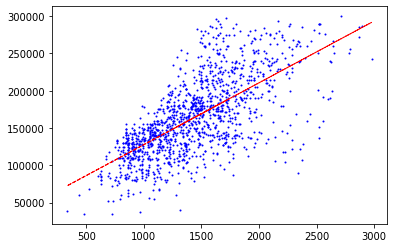

In [8]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

Com o modelo treinado, ele já está pronto para fazer previsões em cima de dados novos. Como separamos lá em cima dos dados de teste na variável `y_test`, vamos fazer as previsões usando o método `predict()` e armazenar na variável `y_pred`.

In [9]:
# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Tem uma frase muito conhecida na área de Comando e Controle (C2) que diz que "você não controla o que não pode medir".

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, 
Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* ***Mean Absolut Error (MAE) -*** é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE) -*** é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [10]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.41934020862008947
MAE:		 30345.259071501783
MSE:		 1560108627.6391702


## Regressão Linear Múltipla

O raciocínio usado na Regressão Linear Múltipla é exatamente o mesmo que vimos com a anterior. A diferença é que temos mais variáveis independentes para considerar no nosso modelo.

Para demonstrar como implementá-la, vou usar um *dataset* mais completo que o nosso anterior, disponível para download [neste link](http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0).

Mantivemos as 1460 entradas, porém temos agora 34 *features*. Vamos importar o arquivo e dar uma olhada nas primeiras entradas.

In [11]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho de df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


Exatamente da mesma maneira, vou dividir os dados entre teste-treino, construir o modelo e executar o método `fit(X_train, y_train)`.

In [12]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Dê uma paradinha agora e compare com o exemplo da Regressão Linear Simples. Qual a diferença? 

Quando tentamos passar uma única *feature*, era passada uma estrutura de apenas uma dimensão, o que fazia o `scikit-learn` a dar um erro. No entanto, quando usamos mais de uma *feature*, já temos objetos de duas dimensões sem a necessidade de redimensionar. Veja os `prints` abaixo para ver as dimensões de cada variável nossa e comparar com o exemplo anterior.

In [13]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


Se na Regressão Linear Simples tínhamos apenas um coeficiente e um intercepto, agora temps um coeficiente para cada variável. Para obtermos os **coeficientes de regressão** e o **intercept**, podemos acessar os atributos do modelo diretamente da variável `ml_model`.


In [14]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.68469699e+02  4.26112665e-01  1.79007052e+04  4.96275287e+03
  3.28887387e+02  6.93390042e+01  9.31193646e+00 -6.31514795e+00
  2.08295017e+00  5.07973868e+00  2.10188869e+01  2.12068699e+01
 -3.23684708e+00  3.89889097e+01  1.07901404e+04  2.07002843e+03
  4.88231461e+03 -1.22239752e+03 -1.08238264e+04 -1.50233490e+04
  3.18422661e+03  1.61616486e+03  1.03725687e+04  1.33600287e-01
  3.88348814e+01  1.36190172e+01 -1.08097147e+01  2.37998712e+01
  5.66616339e+01 -4.84958023e+01 -7.44555959e-01 -2.24767953e+02
 -1.20222799e+03]
Intercepto:	 1566979.384326238


Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável `X_test` como argumento do `ml_model.predict()`, salvar as previsões e verificar o desempenho em cima das métricas já apresentadas.

In [15]:
# verificar desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.7944281414594415
MAE:		 21932.748300065075
MSE:		 1348319609.1187086


Veja como todas as métricas avaliadas tiveram uma melhora significativa. Uma vez que o modelo tinha à disposição mais *features* para treinar, conseguiu se tornar mais preciso também.